# Méthodologie et données - TD/AAG n°3



In [22]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy.io.wavfile as wav
from IPython.display import Audio, display
from scipy.fft import fft, fft2, rfft, fftshift

## Exercice 1 : Filtrage d'une bande de fréquence


Soit un signal  $x(t) = 0.5 + \cos(2 \pi f_0 t) + \cos(2 \pi f_1 t) + \cos(2 \pi f_2 t)$ avec $f_0 = 100$ et $f_1 = 500$ et $f_2 = 760$. On prendra une fréquence d'échantillonnage de $f_e = 16000$~Hz et un signal d'une durée de 0.5s.

**Q1** Tracer le signal $x(t)$ en fonction du temps.

**Q2** Tracer le module du spectre de $x(t)$ en fonction des fréquences. On se limitera aux fréquences utiles.

**Q3** Faire une fonction de filtre qui prend en entrée les fréquences (en fréquences ou en échantillons au choix), les valeurs de coupures et retourne un filtre triangulaire.

**Q4** Appliquer le filtre $H(f)$ correspondant aux fréquences de coupure $f_{s1} = 600$ et $f_{s2} = 800$~Hz au signal $x$. Afficher le module du spectre obtenu.

**Q5** Faites varier les fréquences de coupure, qu'observez-vous ?

In [23]:
tMax = 0.5
fe = 16000
vTemps = np.linspace(0, tMax, int(fe * tMax))

In [24]:
def x(t):
    return 0.5 + np.cos(2 * np.pi * 100 * t) + np.cos(2 * np.pi * 500 * t) + np.cos(2 * np.pi * 760 * t)

signal = x(vTemps)

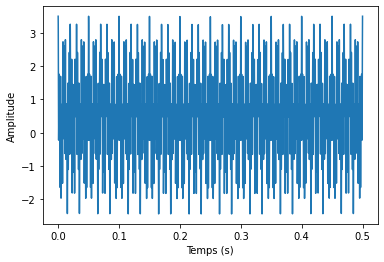

In [25]:
plt.plot(vTemps, signal)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.show()

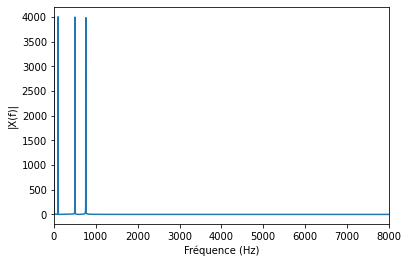

In [26]:
vFreq = np.linspace(0, fe, int(fe * tMax))
Xf = fft(signal)

plt.plot(vFreq, np.abs(Xf))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('|X(f)|')
plt.xlim([0, 8000])
plt.show()


In [27]:
def axb(a, b, x):
    return a*x + b

def triangle(nbEch, debut, fin):

    pente = 1/((fin-debut)/2)

    ordpos = -pente*debut
    ordneg = pente*fin

    triangle = np.zeros(nbEch,)

    for i in range(debut, int((debut+fin)/2)):
        triangle[i] = axb(pente, ordpos, i)
    
    for i in range(int((debut+fin)/2), fin):
        triangle[i] = axb(-pente, ordneg, i)

    return triangle

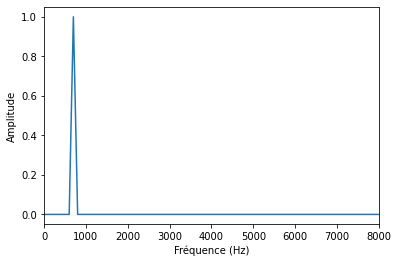

In [28]:
fs1 = 600*tMax
fs2 = 800*tMax

Hf = triangle(int(tMax*fe), int(fs1), int(fs2))

plt.plot(vFreq, Hf)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, 8000])
plt.show()

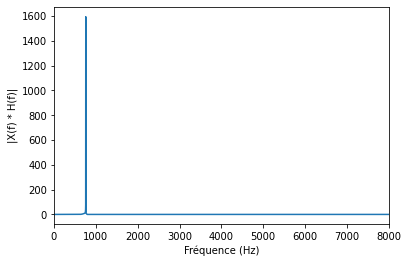

In [29]:
filtre = Xf * Hf

plt.plot(vFreq, np.abs(filtre))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('|X(f) * H(f)|')
plt.xlim([0, 8000])
plt.show()

Faire varier les valeurs de coupures permet de séléctionner les fréquences souhaitées et de réduire les fréquence au bord des coupures

## Exercice 2 : Spectrogramme en bande de Mel

**Q1** Charger le fichier audio `etjelis.wav`, vérifier sa fréquence d'échantillonnage (16000Hz) et segmenter le en trame de 32 ms par pas de 10ms.

**Q2** A partir de la formule vue en TD, calculer les fréquences de Mel correspondant à 60 filtres.

**Q3** Définir les 40 filtres triangulaires $M_r$ correspondant.

**Q4** Pour une trame donnée et un filtre $M_r$ donné, faire une fonction qui calcule l'énergie du signal (son carré), le filtre avec $M_r$ et caclule sa moyenne fréquentielle.

**Q5** Reconstituer l'ensemble sous forme de spectrogramme (représentation temps-fréquence de Mel) et afficher-le.

In [30]:
fe, signal = wav.read('etjelis.wav')
print(fe)

int(signal.shape[0] / fe)

16000


2

In [31]:
def segmentation(y, tTrame, decalage):
    n = int(len(y)/decalage-1)
    trames = np.empty((n,tTrame))
    
    for nn in range(n-1):
        trames[nn,:] = y[decalage*nn : decalage*nn + tTrame]

    trameCopy = y[decalage*(n-1) : decalage*(n-1) + tTrame].copy()
    trameCopy.resize(tTrame)
    trames[n-1] = trameCopy
    

    return trames

In [32]:
trames = segmentation(signal, int(32/1000*fe), int(10/1000*fe))

In [33]:
def freq2mel(f):
    if f < 1000:
        return f
    else:
        return 1000 * np.log2(1 + f / 1000)

In [34]:
def mel2freq(m):
    if m < 1000:
        return m
    else:
        return 1000 * (2 ** (m / 1000) - 1)

In [35]:
fmin = 20
fmax = fe / 2
nFiltres = 60

mf = np.linspace(freq2mel(fmin), freq2mel(fmax), nFiltres)

In [36]:
ff = np.zeros(mf.shape[0])

for m in range(mf.shape[0]):
    ff[m] = mel2freq(mf[m])

ff

array([  20.        ,   73.38855935,  126.77711869,  180.16567804,
        233.55423739,  286.94279673,  340.33135608,  393.71991543,
        447.10847477,  500.49703412,  553.88559346,  607.27415281,
        660.66271216,  714.0512715 ,  767.43983085,  820.8283902 ,
        874.21694954,  927.60550889,  980.99406824, 1048.23695656,
       1125.45422253, 1205.58253166, 1288.73162846, 1375.01539476,
       1464.55200567, 1557.46409141, 1653.8789053 , 1753.92849801,
       1857.74989847, 1965.48530149, 2077.28226254, 2193.29389986,
       2313.67910412, 2438.6027561 , 2568.23595247, 2702.75624013,
       2842.3478594 , 2987.20199636, 3137.51704465, 3293.49887726,
       3455.36112845, 3623.32548636, 3797.62199664, 3978.48937752,
       4166.17534675, 4360.9369609 , 4563.04096739, 4772.76416989,
       4990.39380736, 5216.22794751, 5450.57589501, 5693.75861514,
       5946.10917335, 6207.97319147, 6479.70932106, 6761.6897346 ,
       7054.30063527, 7357.94278584, 7673.03205762, 8000.     

(40, 512)


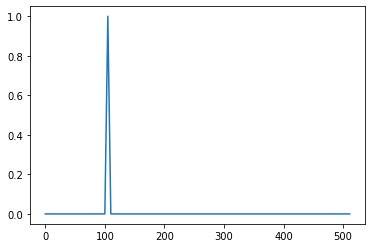

In [37]:
tMaxTrame = 32/1000
tailleTriangle = int(tMaxTrame*fe)
triangles = np.ndarray((40, tailleTriangle))

print(triangles.shape)

for i in range(1, triangles.shape[0]):
    triangles[i] = triangle(tailleTriangle, int(ff[i-1]*tMaxTrame), int(ff[i+1]*tMaxTrame))

plt.plot(triangles[39])
plt.show()

In [38]:
def energieFiltreMoy(trame, Mr):
    energie = trame**2
    filtrage = energie*Mr
    return np.mean(filtrage)

In [39]:
energieFiltreMoy(fft(trames[0]), triangles[39])

(3160840.554527443-2166964.5316114016j)

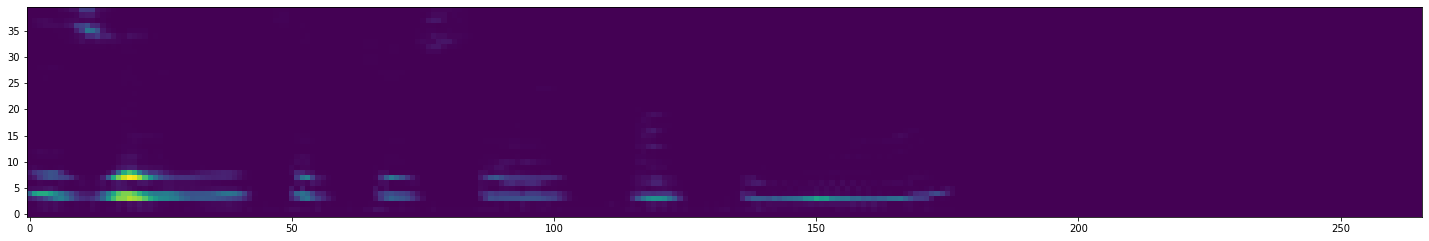

In [44]:
spectrograme = np.ndarray((trames.shape[0], triangles.shape[0]))

for n in range(spectrograme.shape[0]):
    trame = trames[n]
    for i in range(spectrograme.shape[1]):
        t = triangles[i]

        spectrograme[n][i] = energieFiltreMoy(np.abs(fft(trame)), t)

plt.figure(figsize=(25,5))
plt.imshow(spectrograme.T, origin='lower')